In [6]:
import os
import tensorflow as tf
os.environ['TFHUB_MODEL_LOAD_FORMAT']='COMPRESSED'
gpus= tf.config.experimental.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(gpus[0], True)  

In [7]:
import IPython.display as display 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(12,12) 
mpl.rcParams['axes.grid']= False

import numpy as np
import PIL.Image 
import time
import functools

In [8]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
contentpath= tf.keras.utils.get_file("wYTCtRu.jpg", "https://imgur.com/wYTCtRu.jpg")
stylepath=tf.keras.utils.get_file("starry_night.jpg", "https://i.imgur.com/9ooB60I.jpg")

942080/935806 [==============================] - 1s 1us/step


In [10]:
maxdim=512
pathtoimage=contentpath
img=tf.io.read_file(pathtoimage) 
img=tf.image.decode_image(img, channels=3) 
img = tf.image.convert_image_dtype(img, tf.float32)
shape=tf.cast(tf.shape(img)[:-1], tf.float32)
longdim=max(shape)
scale=maxdim/longdim
newshape=tf.cast(shape*scale, tf.int32)

img=tf.image.resize(img, newshape)
img = img[tf.newaxis, :]  
img.shape

TensorShape([1, 320, 512, 3])

In [11]:
def loadimg(pathtoimg):
  max_dim = 512
  img = tf.io.read_file(pathtoimg)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  longdim = max(shape)
  scale = max_dim / longdim

  newshape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, newshape)
  img = img[tf.newaxis, :]
  return img

In [12]:
def imshow(image, title=None):
    if len(image.shape)>3:
        image = tf.squeeze(image, axis=0) 
    plt.imshow(image)
    if title:
        plt.title(title)

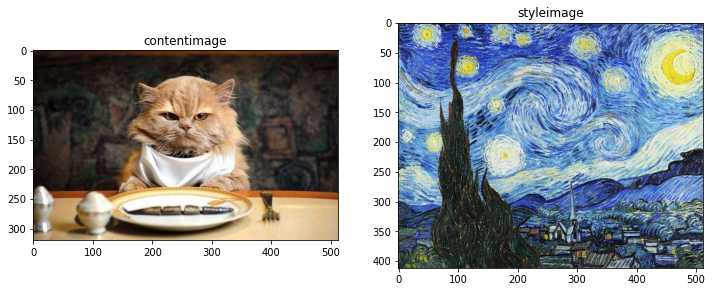

In [13]:
contentimage=loadimg(contentpath)
styleimage=loadimg(stylepath)
plt.subplot(1,2,1)
imshow(contentimage,'contentimage')
plt.subplot(1,2,2)
imshow(styleimage,'styleimage')

In [14]:
import tensorflow_hub as hub
hub_model=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [15]:
def tensortoimage(tensor):
    tensor= tensor*255
    tensor=np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0]==1
        tensor=tensor[0]
    return PIL.Image.fromarray(tensor)

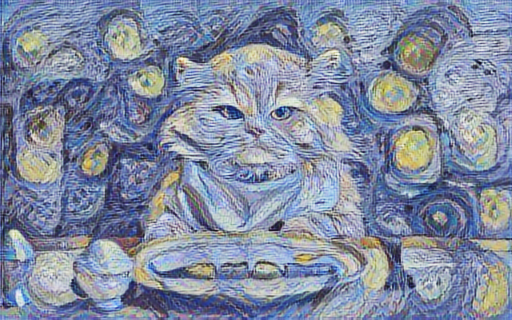

In [16]:
stylizedimage= hub_model(tf.constant(contentimage), tf.constant(styleimage))[0]
tensortoimage(stylizedimage)